In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

In [5]:
x=df.drop(columns='Purchased')
y=df['Purchased']

**Feature Scaling**

In [6]:
fun=MinMaxScaler(feature_range=[0,1])
x_tr=fun.fit_transform(x)
x_tr

array([[0.23263608, 0.        , 0.02380952, 0.02962963],
       [0.98273164, 0.        , 0.4047619 , 0.03703704],
       [0.40992649, 1.        , 0.19047619, 0.20740741],
       ...,
       [0.35247659, 1.        , 0.76190476, 0.03703704],
       [0.75771987, 0.        , 0.42857143, 0.13333333],
       [0.1100476 , 1.        , 0.73809524, 0.15555556]])

**Splitting the dataset into the Training set and Test set**

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_tr,y,test_size=.25,random_state=3)

**Fitting SVM to the Training set**

In [8]:
model=SVC()
model.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [9]:
accuracy_score(y_test,model.predict(x_test))

0.89

**Making the Confusion Matrix**

In [13]:
cm=confusion_matrix(y_test,model.predict(x_test))
cm

array([[59,  6],
       [ 5, 30]], dtype=int64)

<AxesSubplot:>

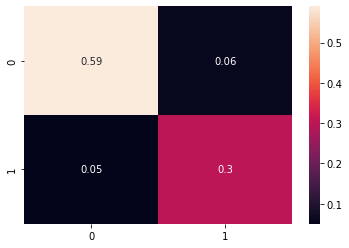

In [14]:
sns.heatmap((cm/np.sum(cm)),annot=True)